In [1]:
suppressPackageStartupMessages({
  library(conos)
  library(pagoda2)
  library(Seurat)
  library(dplyr)
  library(ggplot2)
})

In [2]:
artem.obj = readRDS(
    glue::glue(
        '/home/hsarkar/Projects/neuroblastoma_analysis/data/3_sample_bam/',
        'seurat_objs/adrenal.mouse.seurat.rds'
    )
)

In [4]:
adr.obj = readRDS(
    '/home/hsarkar/Projects/neuroblastoma_analysis/results/seurat_2/5_sample/seurat_obj.rds'
)

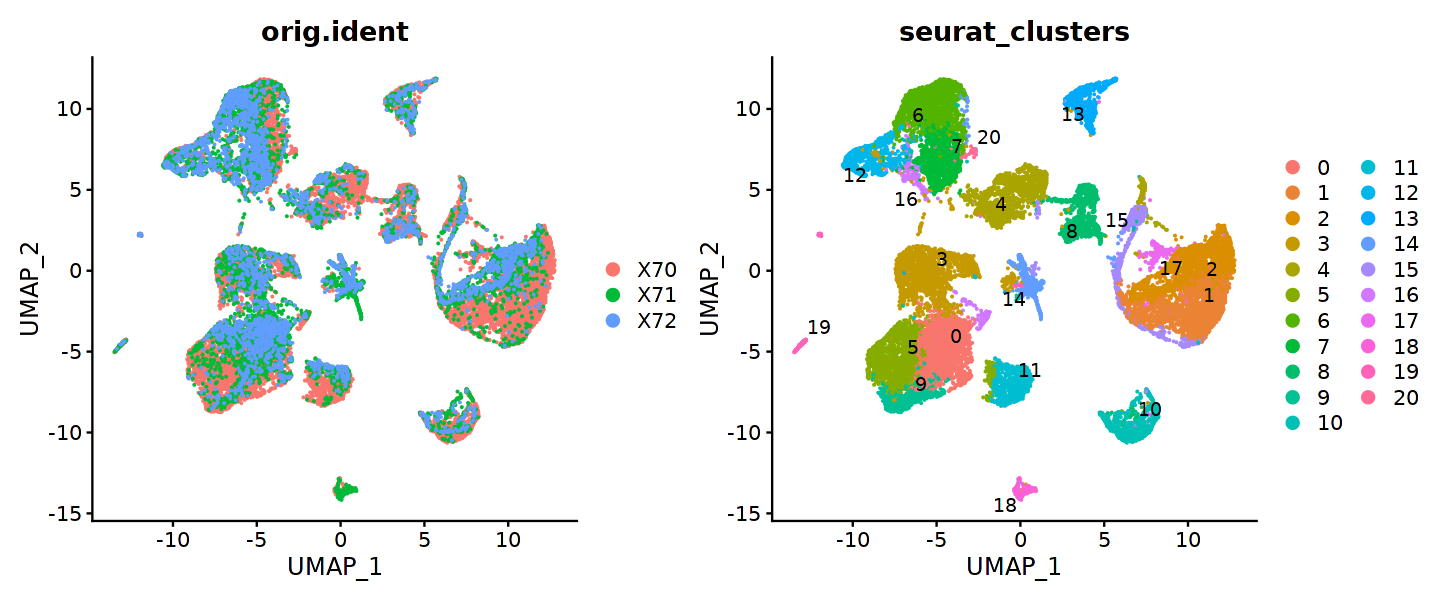

In [5]:
options(repr.plot.height=5, repr.plot.width=12, res=150 ) 
p1 <- DimPlot(artem.obj, reduction = "umap",group.by='orig.ident')
p2 <- DimPlot(artem.obj, 
              group.by = 'seurat_clusters',
              reduction = "umap", label = TRUE, repel = TRUE)
p1 + p2

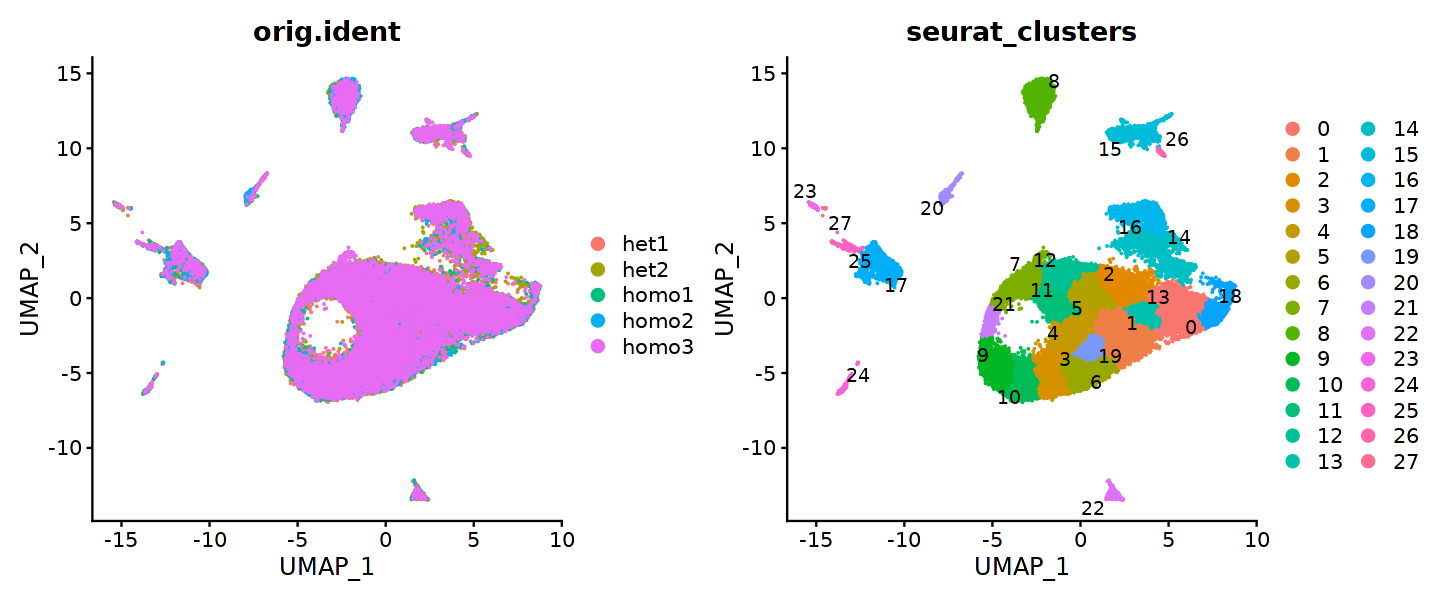

In [6]:
options(repr.plot.height=5, repr.plot.width=12, res=150 ) 
p1 <- DimPlot(adr.obj, reduction = "umap",group.by='orig.ident')
p2 <- DimPlot(adr.obj, 
              group.by = 'seurat_clusters',
              reduction = "umap", label = TRUE, repel = TRUE)
p1 + p2

In [7]:
artem.list = SplitObject(artem.obj, split.by = "orig.ident")
adr.list =  SplitObject(adr.obj, split.by = "orig.ident")

In [8]:
artem.list %>% names

[1] "X70" "X71" "X72"

In [9]:
adr.list %>% names

[1] "het1"  "het2"  "homo1" "homo2" "homo3"

In [10]:
combined.list = c(artem.list, adr.list )

In [11]:
combined.list %>% names

[1] "X70"   "X71"   "X72"   "het1"  "het2"  "homo1" "homo2" "homo3"

In [13]:
features = SelectIntegrationFeatures(
    combined.list
)
s.obj.scaled = lapply(
    X = combined.list,
    FUN = function(x){
        x = ScaleData(x, features = features, verbose = FALSE)
        x = RunPCA(x, features = features, verbose = FALSE)
    }
)

anchors = FindIntegrationAnchors(
    object.list = s.obj.scaled,
    reference = c(1,4,6),
    reduction = 'rpca',
    dims = 1:50,
    
)

combined = IntegrateData(
    anchorset = anchors,
    dims = 1:50
)

Computing 2000 integration features

Scaling features for provided objects

Computing within dataset neighborhoods

Finding anchors between all query and reference datasets

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 9494 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 6696 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 787 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 917 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 822 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 763 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Fou

In [14]:
combined <- ScaleData(combined, verbose = FALSE)
combined <- RunPCA(combined, npcs = 30, verbose = FALSE)
combined <- RunUMAP(combined, reduction = "pca", dims = 1:30)
combined <- FindNeighbors(combined, reduction = "pca", dims = 1:30)
combined <- FindClusters(combined, resolution = 0.5)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
06:46:31 UMAP embedding parameters a = 0.9922 b = 1.112

06:46:31 Read 65047 rows and found 30 numeric columns

06:46:31 Using Annoy for neighbor search, n_neighbors = 30

06:46:31 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

06:46:46 Writing NN index file to temp file /tmp/RtmpZgPoR8/filea3967111c735

06:46:46 Searching Annoy index using 1 thread, search_k = 3000

06:47:17 Annoy recall = 100%

06:47:17 Commencing smooth kNN distance calibration using 1 thread

06:47:22 Initializing fr

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 65047
Number of edges: 2491103

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9215
Number of communities: 28
Elapsed time: 34 seconds


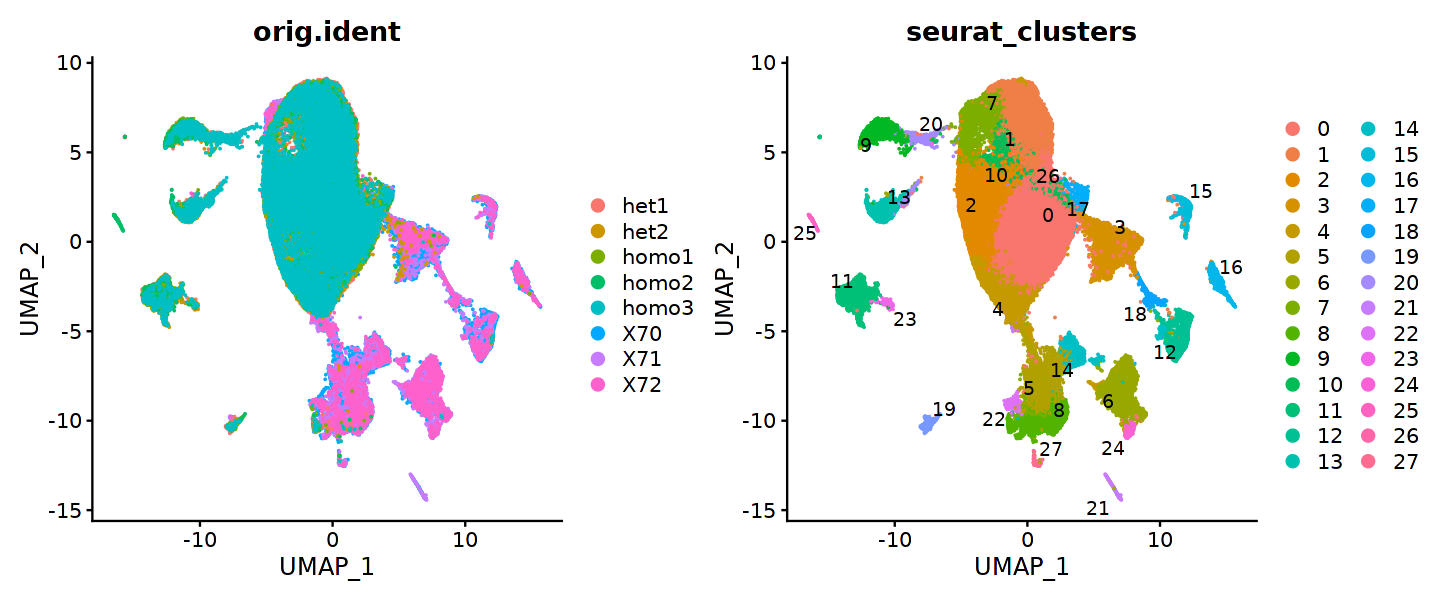

In [15]:
options(repr.plot.height=5, repr.plot.width=12, res=150 ) 
p1 <- DimPlot(combined, reduction = "umap",group.by='orig.ident')
p2 <- DimPlot(combined, 
              group.by = 'seurat_clusters',
              reduction = "umap", label = TRUE, repel = TRUE)
p1 + p2

In [16]:
combined <- FindClusters(combined, resolution = 0.3)

Warning message:
“The following arguments are not used: set.seed”
Warning message:
“The following arguments are not used: set.seed”


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 65047
Number of edges: 2491103

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9374
Number of communities: 23
Elapsed time: 33 seconds


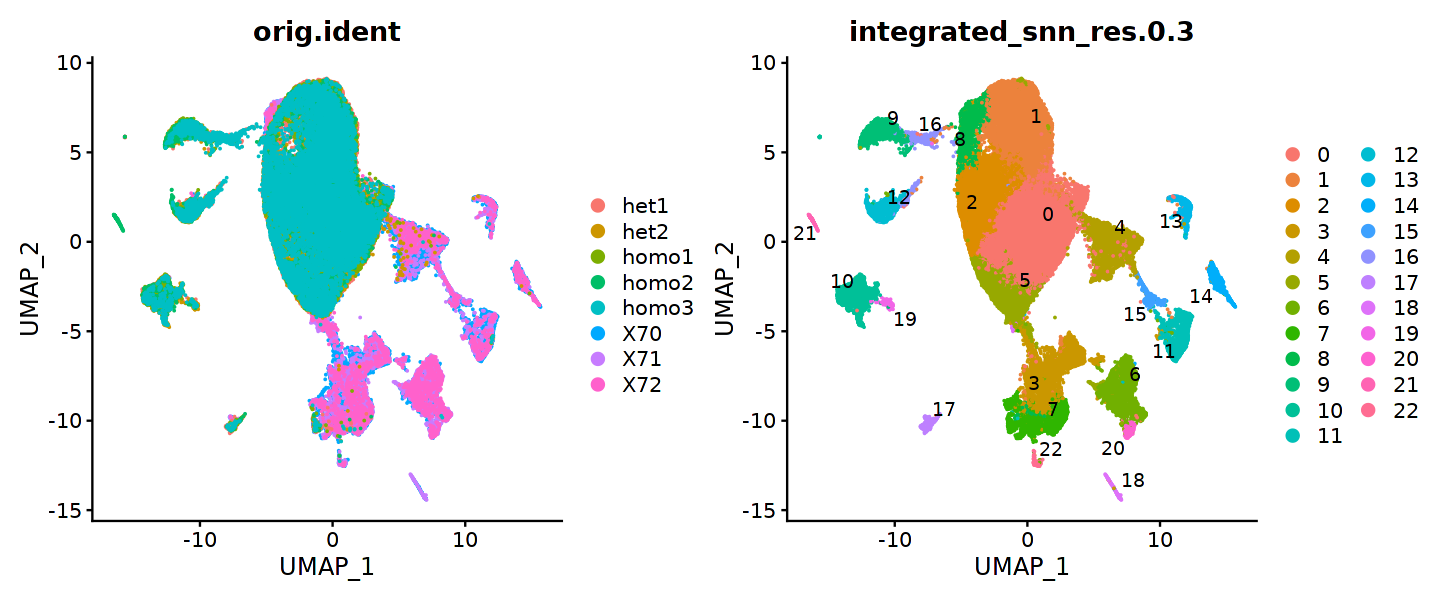

In [18]:
options(repr.plot.height=5, repr.plot.width=12, res=150 ) 
p1 <- DimPlot(combined, reduction = "umap",group.by='orig.ident')
p2 <- DimPlot(combined, 
              group.by = 'integrated_snn_res.0.3',
              reduction = "umap", label = TRUE, repel = TRUE)
p1 + p2

In [17]:
combined@meta.data %>% head

,orig.ident,nCount_RNA,nFeature_RNA,RNA_snn_res.0.5,seurat_clusters,percent.mt,integrated_snn_res.0.5,integrated_snn_res.0.3,annot,adrn_score1,UMAP_1,UMAP_2
,<chr>,<dbl>,<int>,<chr>,<fct>,<dbl>,<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>
X70_AAACCCAAGAGGCTGT,X70,3188,1685,1,4,NA,3,4,NA,NA,NA,NA
X70_AAACCCAAGGATGCGT,X70,3643,1751,3,3,NA,14,3,NA,NA,NA,NA
X70_AAACCCAAGGCTATCT,X70,5272,2118,11,3,NA,14,3,NA,NA,NA,NA
X70_AAACCCAAGGGCAACT,X70,7761,2829,7,6,NA,6,6,NA,NA,NA,NA
X70_AAACCCACAACGCCCA,X70,6058,2222,6,6,NA,6,6,NA,NA,NA,NA
X70_AAACCCACATAGAGGC,X70,1533,864,1,4,NA,3,4,NA,NA,NA,NA


In [22]:
mito.genes = grep(pattern = "^mt-", x = rownames(combined@assays$RNA), 
                  value = TRUE, ignore.case = TRUE)
rpl.genes = grep(pattern = "^rpl", x = rownames(combined@assays$RNA), 
                 value = TRUE, ignore.case = TRUE)
rps.genes = grep(pattern = "^rps", x = rownames(combined@assays$RNA), 
                 value = TRUE, ignore.case = TRUE)
genes.removed = union(mito.genes, rpl.genes)
genes.removed = union(genes.removed, rps.genes) 

In [23]:
length(genes.removed)

[1] 123

In [24]:
combined.remove = combined[setdiff(rownames(combined@assays$RNA), genes.removed),]

In [26]:
saveRDS(
    combined.remove,
    '/home/hsarkar/Projects/neuroblastoma_analysis/results/seurat_2/8_sample/seurat_obj.rds'
)

In [20]:
source('/home/hsarkar/Projects/neuroblastoma_analysis/scripts/SeuratRun.r')

Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning me

In [27]:
save_seurat_as_pagoda(
    combined.remove,
    glue::glue(
        '/home/hsarkar/Projects/neuroblastoma_analysis/data/with_ribo/',
        '8_samples.bin'
    ),
    app.title = '8_samples'
)

65047 cells, 32022 genes; normalizing ... 

Using plain model 

Winsorizing ... 

log scale ... 

done.


calculating variance fit ...

 using gam 

3777 overdispersed genes ... 3777

persisting ... 

done.

running PCA using 3000 OD genes .

.

.

.

 done




creating space of type angular done
adding data ... done
building index ... done
querying ... done


Estimating embeddings.


Warning message in p2$getEmbedding(type = "PCA", embeddingType = "tSNE", perplexity = perplexity, :
“Too many cells to pre-calculate correlation distances, switching to L2. Please consider using UMAP.”
running tSNE using 20 cores:




creating space of type angular done
adding data ... done
building index ... done
querying ... done
Calculating hdea...


Using multilevel clustering for PCA space




Making KNN graph...


NULL

In [ ]:
saveRDS(
    combined,
    ''
)